# Multiple Linear Regression

Multiple Linear Regression is an extension of Simple Linear regression as it takes more than one predictor variable to predict the response variable. It is an important regression algorithm that models the linear relationship between a single dependent continuous variable and more than one independent variable. It uses two or more independent variables to predict a dependent variable by fitting a best linear relationship.

It has two or more independent variables (X) and one dependent variable (Y), where Y is the value to be predicted. Thus, it is an approach for predicting a quantitative response using multiple features.

Recall that the simple linear regression equation is as follows:

Y=β0+β1X1
 
where:

β0
  is the intercept, interpreted as the value of  Y
  when  X1=0
 ;
β1
  is the coefficient, interpreted as the effect on  Y
  for a one unit increase in  X1
 ; and
X1
  is the single predictor variable.
Extending that idea to multiple linear regression is as simple as adding an  Xj
  and corresponding  βj
  for each of the  p
  predictor variables, where  j
  is an element of the set  [1,p]
  
 # Also 
 

Hence in multiple linear regression, our regression equation becomes:

Y=β0+β1X1+β2X2+...+βpXp
 

where:

Y
  is the reponse variable which depends on the  p
  predictor variables;
β0
  is the intercept, interpreted as the value of  Y
  when all predictor variables are equal to zero;
βj
  is the average effect on  Y
  of a one unit increase in  Xj
 , assuming all other predictors are held fixed.

# Equation: Y = β0 + β1X1 + β2X2 + β3X3 + … + βnXn + e

Y = Dependent variable / Target variable

β0 = Intercept of the regression line

β1, β2, β3, …. βn = Slope of the regression line which tells whether the line is increasing or decreasing

X1, X2, X3, ….Xn = Independent variable / Predictor variable

e = Error

Example: Predicting sales based on the money spent on TV, Radio, and Newspaper for marketing. In this case, there are three independent variables, i.e., money spent on TV, Radio, and Newspaper for marketing, and one dependent variable, i.e., sales, that is the value to be predicted.

# Multiple Linear Regression Implementation using Python
Problem statement: Build a Multiple Linear Regression Model to predict sales based on the money spent on TV, Radio, and Newspaper for advertising.

In [122]:
# IMPORT THE PACAKGES
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


In [123]:
# reading the dataset
dataset = pd.read_csv("advertising.csv")




In [124]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [125]:
dataset.shape

(200, 4)

# Equation: Sales = β0 + (β1 * TV) + (β2 * Radio) + (β3 * Newspaper) + e

## Modelling Sales

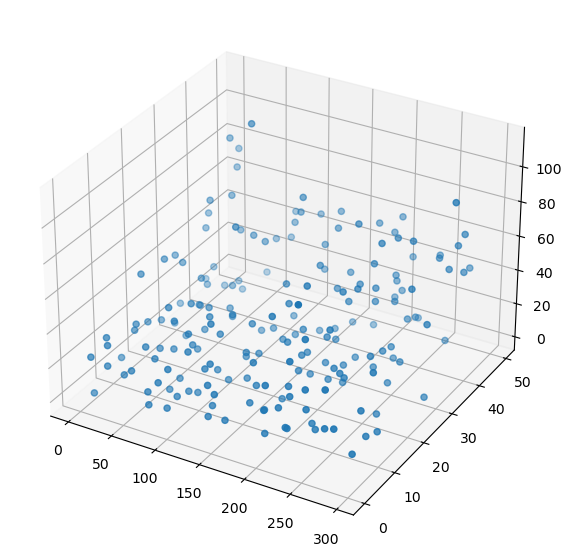

In [126]:
# create figure and 3d axes
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111, projection='3d')



# scatter plot with response variable and 2 predictors
ax.scatter(dataset['TV'], dataset['Radio'], dataset['Newspaper'])

In [127]:
# Setting the values for independent (X) variable and dependent (Y) variable
#Setting the value for X and Y


X = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

# Fitting a multiple regression model
In sklearn, fitting a multiple linear regression model is similar to fitting a simple linear regression. This time, of course, our  𝑋
  contains multiple columns, where it only contained one before.

In [128]:
# create model object
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [129]:
# split into train and test
# import train/test split module
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)

In [130]:
#shapes of splitted data
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (160, 3)
X_test: (40, 3)
Y_train: (160,)
Y_test: (40,)


In [131]:
# train model
lm.fit(X_train, y_train)


LinearRegression()

# Having fit our model to the provided training data, we can now inspect its coefficients to get a better understanding of their influence on the predictions the model will provide.

In [132]:
# extract model intercept
beta_0 = float(lm.intercept_)


In [133]:
# extract model coefficients
beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [134]:
#Intercept and Coefficient
print("Intercept: ", lm.intercept_)
print("Beta js", beta_js)

print("Coefficients:")
list(zip(X, lm.coef_))

Intercept:  4.637624442397916
Beta js            Coefficient
TV            0.055079
Radio         0.103086
Newspaper    -0.000901
Coefficients:


[('TV', 0.05507864886595038),
 ('Radio', 0.10308563242816521),
 ('Newspaper', -0.0009011470592842919)]

This line of code extracts the coefficients of the linear regression model (lm) and stores them in a pandas DataFrame called beta_js. Here's a breakdown of what each part of the line does:

pd.DataFrame(): This is a constructor for creating a pandas DataFrame. It's used here to create a DataFrame from the coefficients.

lm.coef_: This retrieves the coefficients of the linear regression model lm. In a linear regression model, the coefficients represent the weights assigned to each feature (or predictor) in the model.

X.columns: This retrieves the column names of the DataFrame X, which presumably contains the predictor variables used to train the linear regression model. These column names will be used as the index (row labels) for the resulting DataFrame beta_js.

columns=['Coefficient']: This specifies the name of the column in the resulting DataFrame where the coefficients will be stored. Each coefficient will be associated with the corresponding predictor variable.

# Regression Equation: Sales = 4.6376+ (0.055079 * TV) + (0.103086* Radio) - (0.000901 * Newspaper) + e

In [135]:
#Prediction of test set
y_pred_lm= lm.predict(X_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_lm))

Prediction for test set: [21.32727775 18.06138419 10.04630254 21.0925422  20.78527508 24.52786989
 16.84180311 15.656542   10.13878037 18.88248026 15.80983753 10.54583142
 18.93346094 15.56643436 17.86877073 15.29349959 13.75707845 21.06397901
 10.05959685 19.27534125 11.15389873 12.04216022  8.63037961 11.98644768
 12.61490963 16.85722247  9.73227033 21.11417665 18.15109551 19.56290183
 22.11237483 17.82764148 16.54733981 14.78435804 21.41405363 16.96663966
 17.22580207 12.32418381 21.07962358  7.77386767]


In [136]:
#Prediction of train set
y_pred_lm2= lm.predict(X_train)
#Predicted values
print("Prediction for train set: {}".format(y_pred_lm2))

Prediction for train set: [ 5.37731963  9.62675338  6.89384449 19.22924122  7.89909736 15.19724413
 13.73809281 21.05304802 20.560247   20.54097517 24.90829254 14.97339478
  7.33542477 19.40464461 21.32795589 14.77364483 17.20428021  7.12176855
 18.3000753   9.65745071 13.75562754 13.7956302   8.00883877 23.6625657
 24.16866327 10.09011008  9.04664153 16.96297579 18.73527922  8.90652592
 22.06132348 20.7991394  24.84622369  9.04517262  9.48008726 18.296031
  9.50741639  8.91476475 22.15433009 15.14129948 17.14794065 12.53142592
 18.23488321 17.20858941  9.90398038 10.78475525 10.84839776  7.90232189
 18.10531101 16.57293646 16.34156599 23.84876079 13.00390374 12.51360528
 18.13112336 16.74384491  7.11060984 15.33947433 10.87424044 14.63324222
  9.9927332  18.21785545  6.3377644  17.91026441 10.25415824 18.72332939
 17.11638968 21.49774903 11.16467854 15.90029903 21.14549908  6.0541037
 14.19974587  9.39593656 20.63112912 16.54645206 12.06360857  8.75053056
 10.56655606 19.3911711  18.9

In [137]:
#Actual value and the predicted value
lm_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_lm})
lm_diff.head(5)

,Actual value,Predicted value
58,23.8,21.327278
40,16.6,18.061384
34,11.9,10.046303
102,19.8,21.092542
184,17.6,20.785275


pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_lm}): This creates a pandas DataFrame with two columns: 'Actual value' and 'Predicted value'.

y_test: This likely contains the actual target values (ground truth) for the test set. Each row represents an observation, and the values in this column are the actual values of the target variable.

y_pred_lm: This likely contains the predicted values of the target variable generated by the linear regression model (lm) for the corresponding observations in the test set. Each value in this column represents the model's prediction for the corresponding row in y_test.

lm_diff.head(5): This displays the first five rows of the DataFrame lm_diff. The .head(5) function retrieves the first five rows of the DataFrame, providing a quick look at the actual and predicted values for the first few observations in the test set.

So, lm_diff provides a side-by-side comparison of the actual values and the predicted values for the target variable (usually denoted as 'y') in the test set. This allows for a quick comparison of how well the model's predictions align with the actual data.

In [138]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, y_pred_lm)
MSE = metrics.mean_squared_error(y_test, y_pred_lm)
R_squared = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lm))
print('R squared: {:.2f}'.format(lm.score(X,y)))
print('Mean Absolute Error:', MAE)
print('Mean Square Error:', MSE)
print('Root Mean Square Error:', R_squared)

R squared: 0.90
Mean Absolute Error: 1.2754390912939684
Mean Square Error: 2.4093336128923686
Root Mean Square Error: 1.5522028259516758


In [139]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_train, y_pred_lm2)
MSE = metrics.mean_squared_error(y_train, y_pred_lm2)
R_squared = np.sqrt(metrics.mean_squared_error(y_train, y_pred_lm2))
print('R squared: {:.2f}'.format(lm.score(X,y)))
print('Mean Absolute Error:', MAE)
print('Mean Square Error:', MSE)
print('Root Mean Square Error:', R_squared)

R squared: 0.90
Mean Absolute Error: 1.2389958392282172
Mean Square Error: 2.7903742188245175
Root Mean Square Error: 1.670441324568007


# Checking for independence

Checking for independence

autocorreltaion - corelation between the resuduals of the residulas of teh fitted regression model


Residuals vs. predictor variable plots The first check we do involves plotting the residuals (vertical distances between each data point and the regression hyperplane). We are looking to confirm the independence assumption here, i.e., the residuals should be independent. If they are, we will see:

Residuals approximately uniformly randomly distributed about the zero x-axes;

we are always looking for the data pints to be distributed uniformly  randonly about teh zero x axixi in each case


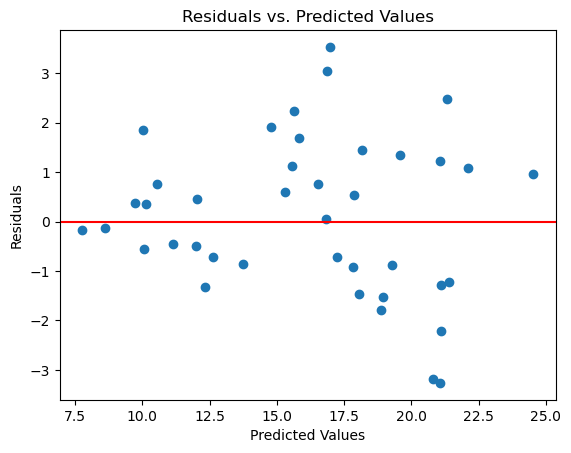

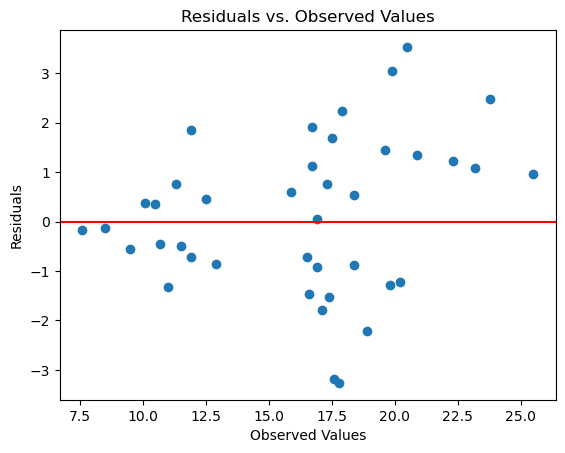

In [140]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred_lm

# Plot residuals vs. predicted values
plt.scatter(y_pred_lm, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.show()

# Plot residuals vs. observations
plt.scatter(y_test, residuals)
plt.xlabel("Observed Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Observed Values")
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.show()


# normality test

Normality testing assesses whether the residuals of a regression model follow a normal distribution. Here's a comprehensive explanation:

Normality Test:

In regression analysis, it is often assumed that the residuals (errors) follow a normal distribution. A normal distribution means that the data is symmetrically distributed around the mean, with the majority of the data points clustered around the center and fewer data points further away from the mean.

Why Normality Matters:

Normality of residuals is important for several reasons:

It ensures the validity of statistical tests and confidence intervals derived from the regression model.
Many statistical techniques rely on the assumption of normality, such as hypothesis testing and calculating confidence intervals.
Violations of normality assumptions can lead to biased parameter estimates and incorrect inferences.
How to Test Normality:

There are several methods to test for normality of residuals:

Visual Inspection:



Plotting a histogram or a Q-Q plot (Quantile-Quantile plot) of the residuals can provide a visual assessment of their distribution compared to a normal distribution.

Shapiro-Wilk Test: It directly tests whether a sample comes from a normally distributed population.

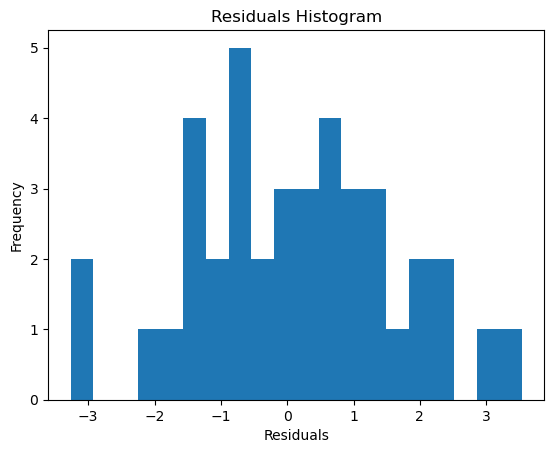

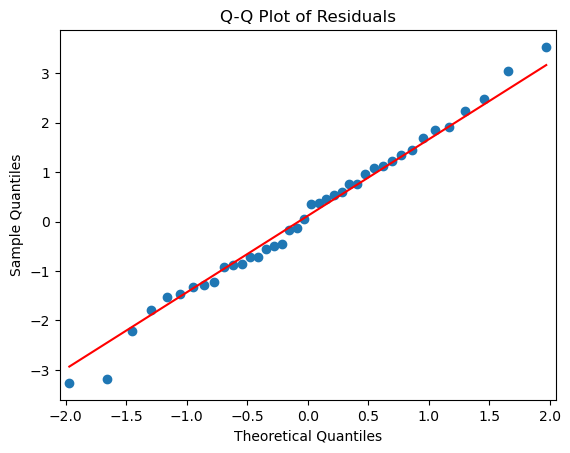

In [141]:
# Residuals
residuals = y_test - y_pred_lm

# Histogram
plt.hist(residuals, bins=20)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()


# Linearity Check:

Linearity check in regression analysis assesses whether the relationship between the predictor variables and the response variable is linear. Here's an explanation:

Linearity Check:

The linearity assumption in regression analysis states that the relationship between the predictor variables and the response variable is linear. This means that changes in the predictor variables result in proportional changes in the response variable, and the relationship can be adequately represented by a straight line.

Why Linearity Matters:

Linearity is a fundamental assumption in regression analysis. If the relationship between the predictor variables and the response variable is not linear, the regression model may provide biased estimates and inaccurate predictions.
Nonlinear relationships may indicate that additional predictors need to be included in the model or that transformations of the predictor variables are necessary to capture the underlying relationship.
How to Test Linearity:

There are several methods to check for linearity in regression analysis:

Visual Inspection:

Plotting scatterplots of each predictor variable against the response variable can provide an initial assessment of linearity. A linear relationship would appear as a roughly straight line pattern.


Plotting residuals against the predicted values can reveal patterns that indicate nonlinearity. Ideally, residuals should be randomly scattered around zero with no discernible patterns.

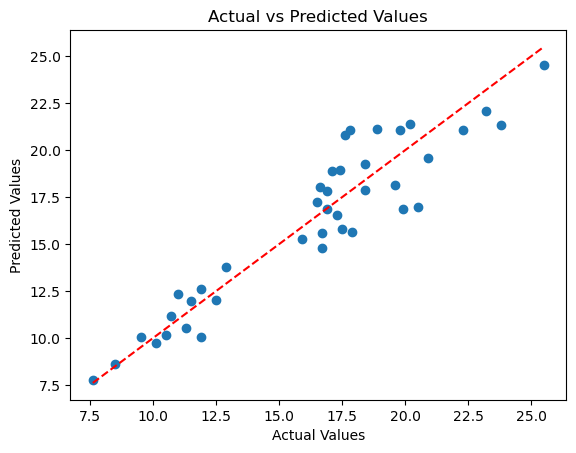

In [142]:
plt.scatter(y_test, y_pred_lm)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


# Homoscedasticity Check

constant variance amongst reisuals for all teh fitted values.
the opposite is heteroskedascticity( non cocnnat variance amonst residuals for all fitted values.
we do not use heteroscedaticity since it is difficult to gauge true standard deviation of forecast or prediction erros


Homoscedasticity:

In a homoscedastic scenario, the residuals exhibit constant variance across all levels of the independent variables.
Visually, this appears as a consistent spread of data points around the regression line when plotted against the predicted values.
Homoscedasticity indicates that the model's errors have a consistent level of variability, which is desirable for making reliable predictions.
It simplifies the interpretation of the model's performance and ensures that the model's predictions have reliable confidence intervals.

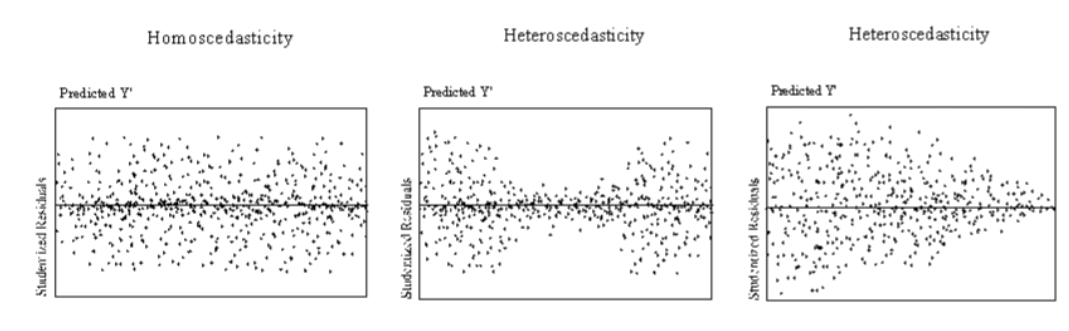


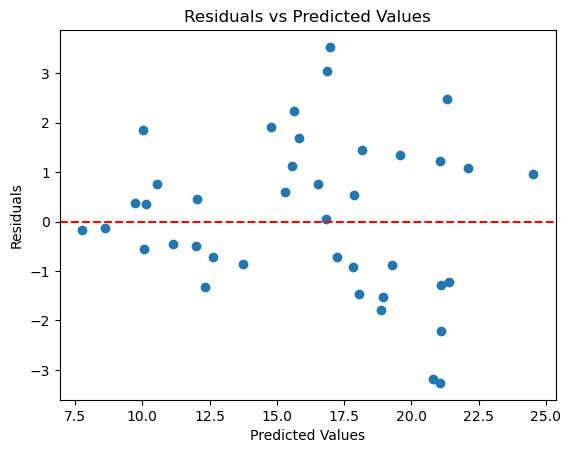

In [143]:
plt.scatter(y_pred_lm, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


#  Multicollinearity Check
we observe between predictor varaible in the data. Alwaya defined as correlation between tow or more predictive variables

so we always acheck multicollinearty by calculating the Varinace Inflation Factor(VIF)- for the x vriables. They only fall under three cateogory
0-5 = all good
5-10 = pay attention to remove it
 geater than 10 = high multocollinearity, need address


VIF values below 5 generally indicate no significant multicollinearity issues.
VIF values between 5 and 10 suggest moderate multicollinearity, which may need attention.
VIF values above 10 indicate high multicollinearity, and the corresponding predictor variable may need to be addressed (possibly removed from the model).



In [144]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


    Variable       VIF
0         TV  2.486772
1      Radio  3.285462
2  Newspaper  3.055245


# Assesing the model Accuracy

Let's assess the fit of our multivariate model. For a rudimentary comparison, let's measure model accuracy against a simple linear regression model that uses only `Newspaper` as a predictor variable for `sales`.

In [145]:
# comparison linear model
slr = LinearRegression()

slr.fit(X_train[['Newspaper']], y_train)

LinearRegression()

In [146]:
from sklearn import metrics
import math

Let's calculate the training Mean Squared Error (MSE), test MSE, and test Root Mean Squared Error (RMSE) for both our Simple Linear Regression (SLR) and Multiple Linear Regression (MLR) models.

In [147]:
# dictionary of results
results_dict = {'Training MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_train, slr.predict(X_train[['Newspaper']])),
                        "MLR": metrics.mean_squared_error(y_train, lm.predict(X_train))
                    },
                'Test MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_test, slr.predict(X_test[['Newspaper']])),
                        "MLR": metrics.mean_squared_error(y_test, lm.predict(X_test))
                    },
                'Test RMSE':
                    {
                        "SLR": math.sqrt(metrics.mean_squared_error(y_test, slr.predict(X_test[['Newspaper']]))),
                        "MLR": math.sqrt(metrics.mean_squared_error(y_test, lm.predict(X_test)))
                    }
                }

In [148]:
# create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)

In [149]:
results_df

,Training MSE,Test MSE,Test RMSE
SLR,28.552533,21.714956,4.659931
MLR,2.790374,2.409334,1.552203


Training MSE (Mean Squared Error): This metric measures the average squared difference between the actual and predicted values for the target variable (sales) on the training dataset. Lower values indicate better performance.

For SLR: The training MSE is 28.552533.
For MLR: The training MSE is 2.790374.
Test MSE (Mean Squared Error): Similar to training MSE, this metric measures the average squared difference between the actual and predicted values for the target variable on the test dataset. Again, lower values indicate better performance.

For SLR: The test MSE is 21.714956.
For MLR: The test MSE is 2.409334.
Test RMSE (Root Mean Squared Error): RMSE is the square root of the MSE, providing a measure of the average magnitude of the errors in the predicted values. Lower values indicate better fit between the predicted and actual values.

For SLR: The test RMSE is 4.659931.
For MLR: The test RMSE is 1.552203.
From these results:

The MLR model performs significantly better than the SLR model in terms of all three metrics (training MSE, test MSE, and test RMSE). This indicates that including multiple predictor variables in the MLR model improves its ability to predict sales compared to using only the 'Newspaper' variable in the SLR model.
The MLR model has considerably lower errors (MSE) on both the training and test datasets compared to the SLR model, indicating better fit to the data.
The RMSE values further confirm the superior performance of the MLR model, showing lower average magnitude of errors in its predictions compared to the SLR model.

In [150]:
# Pairwise scatter plots
from seaborn import pairplot

C:\Users\Trish\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


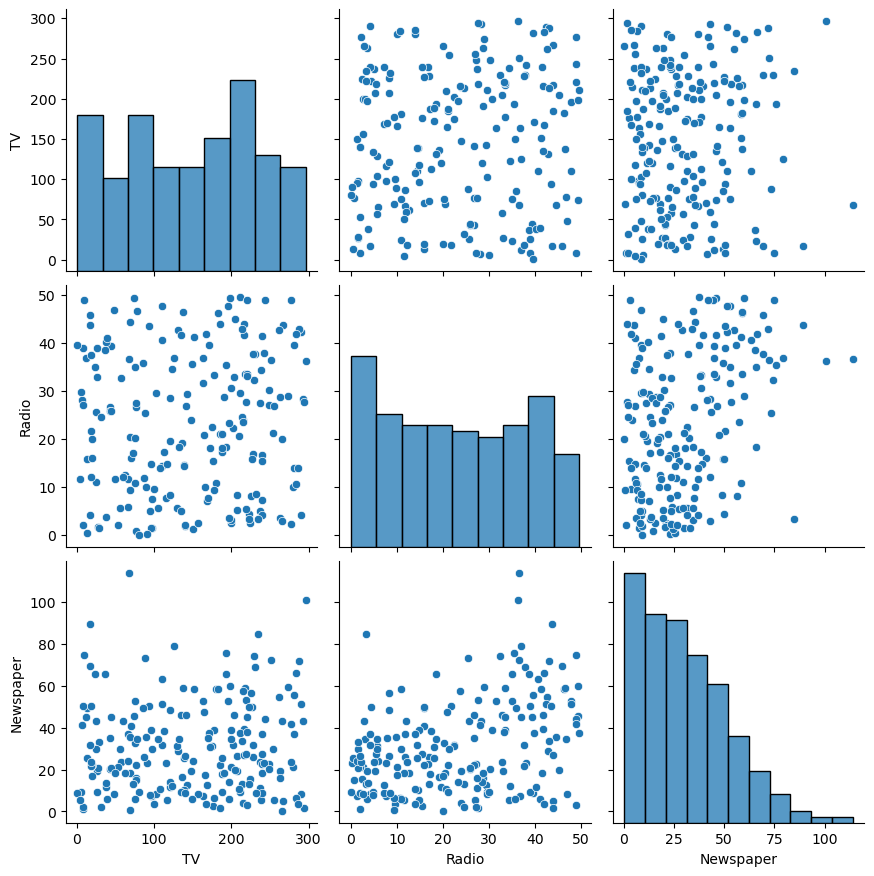

In [151]:
# Drop the target variable 'Sales' to focus on predictors
g = pairplot(dataset.drop('Sales', axis='columns'))
g.fig.set_size_inches(9, 9)

# heat map

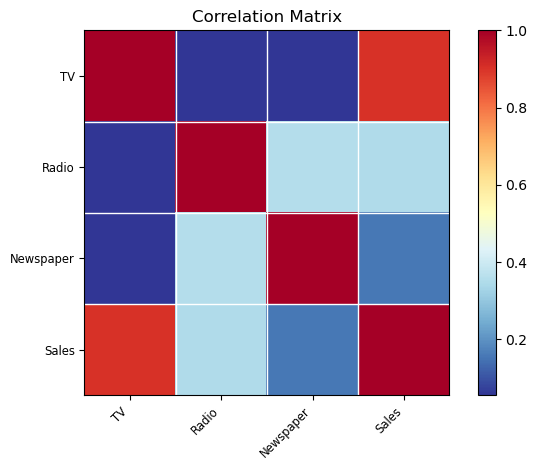

In [152]:
# Correlation heatmap
corr = dataset.corr()  
from statsmodels.graphics.correlation import plot_corr
fig = plot_corr(corr, xnames=corr.columns)

# Correlation Matrix:

The correlation matrix is a square matrix where each row and column represent a variable in our dataset.
Each cell in the matrix contains the correlation coefficient between the corresponding pair of variables.
The correlation coefficient ranges from -1 to 1.
A value of 1 indicates a perfect positive correlation (as one variable increases, the other variable increases).
A value of -1 indicates a perfect negative correlation (as one variable increases, the other variable decreases).
A value of 0 indicates no linear correlation between the variables.


# Correlation Heatmap:

The heatmap visualizes the correlation matrix using colors. Typically, a gradient of colors is used where:
Positive correlations are represented by shades of one color (e.g., shades of blue).
Negative correlations are represented by shades of another color (e.g., shades of red).
No correlation (correlation coefficient = 0) is represented by a neutral color (e.g., white or light gray).
The heatmap helps you quickly identify patterns and relationships between variables based on their correlation coefficients.
Interpreting the Heatmap:

You'll see a square grid where rows and columns represent variables.
Each cell in the grid contains a color representing the correlation coefficient between the corresponding pair of variables.
Darker colors indicate stronger correlations (either positive or negative), while lighter colors indicate weaker or no correlations.
You can look for clusters of dark cells to identify groups of variables that are highly correlated with each other.
You can also look for individual cells to identify specific correlations between pairs of variables.
The plot_corr function from statsmodels.graphics.correlation module generates this heatmap based on the correlation matrix (corr) computed from your dataset. The xnames=corr.columns argument specifies the column names of your dataset to label the heatmap appropriately.

# Generate the regression string


In [153]:
formula_str = 'Sales ~ TV + Radio + Newspaper'
print("Regression formula:", formula_str)

Regression formula: Sales ~ TV + Radio + Newspaper


In [154]:
formula_str = dataset.columns[-1]+' ~ '+'+'.join(dataset.columns[:3]); formula_str

'Sales ~ TV+Radio+Newspaper'

# Construct and fit the model

In [155]:
import statsmodels.api as sm

# Generate the regression string
formula_str = 'Sales ~ TV + Radio + Newspaper'

# Construct and fit the model
model = sm.OLS.from_formula(formula=formula_str, data=dataset)  # Use 'OLS.from_formula' instead of 'ols'
fitted = model.fit()

# Print model summary
print(fitted.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           8.13e-99
Time:                        19:50:50   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.0

# checking for indepedence

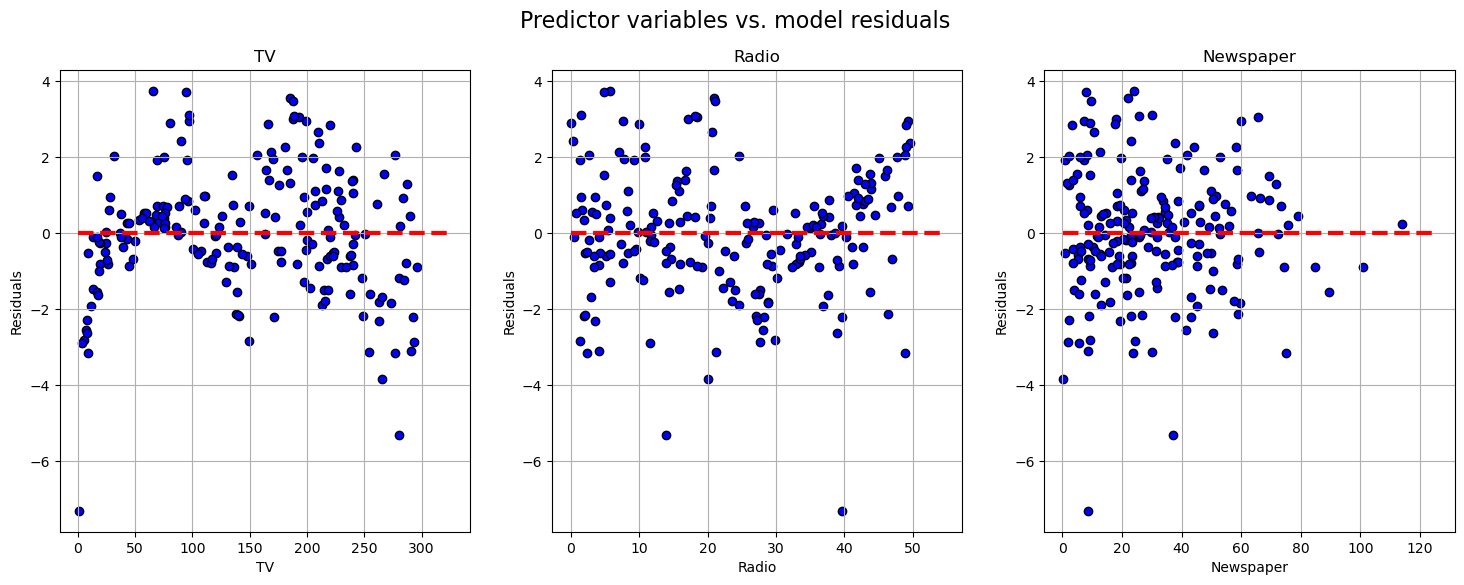

In [156]:
import matplotlib.pyplot as plt

# Assuming 'dataset' is your DataFrame and 'fitted' is your fitted linear regression model

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Predictor variables vs. model residuals', fontsize=16)

for index, column in enumerate(dataset.columns[:3]):
    axs[index].set_title("{}".format(column), fontsize=12)
    axs[index].scatter(x=dataset[column], y=fitted.resid, color='blue', edgecolor='k')
    axs[index].grid(True)
    xmin = min(dataset[column])
    xmax = max(dataset[column])
    axs[index].hlines(y=0, xmin=xmin*0.9, xmax=xmax*1.1, color='red', linestyle='--', lw=3)
    axs[index].set_xlabel(column)
    axs[index].set_ylabel('Residuals')

plt.show()



#  Checking for homoscedasticity
The next check we'll do is for whether the variance of the residuals (the error terms) is constant as the fitted values increase.

We can determine this by plotting the magnitude of the fitted values (i.e.: sales) against the residuals. What we are looking for ate the plotted points that approximately form a rectangle. In other words, the magnitude of the residuals should not increase as the fitted values increase (if that is the case, the data will form the shape of a cone on its side).

If the variance is constant, we have observed homoscedasticity. If the variance is not constant, we have observed heteroscedasticity. We can use the same plot to check for outliers, which are any plotted points that are visibly separate from the random pattern of the rest of the residuals.

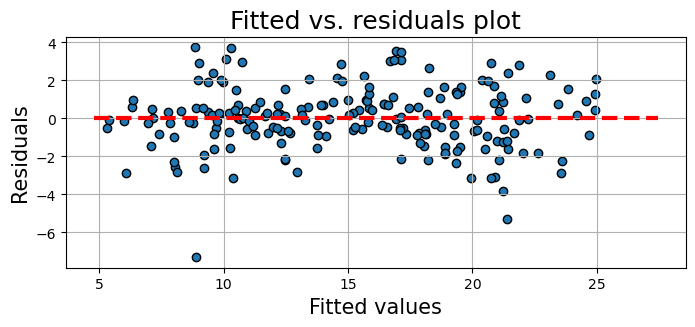

In [157]:
plt.figure(figsize=(8,3))
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
xmin = min(fitted.fittedvalues)
xmax = max(fitted.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()


# Checking for normality
Here we attempt to confirm our assumption of normality amongst the residuals. If the residuals are non-normally distributed, confidence intervals can become too wide or too narrow, which leads to difficulty in estimating coefficients based on the minimisation of ordinary least squares.

We can check for violations of the normality assumption in two different ways:

Plotting a histogram of the normalised residuals;

Generating a Q-Q plot of the residuals.

Histogram of normalised residuals
We plot a histogram of the residuals to take a look at their distribution. It is fairly easy to pick up when a distribution looks similar to the classic bell curve shape of the normal distribution.

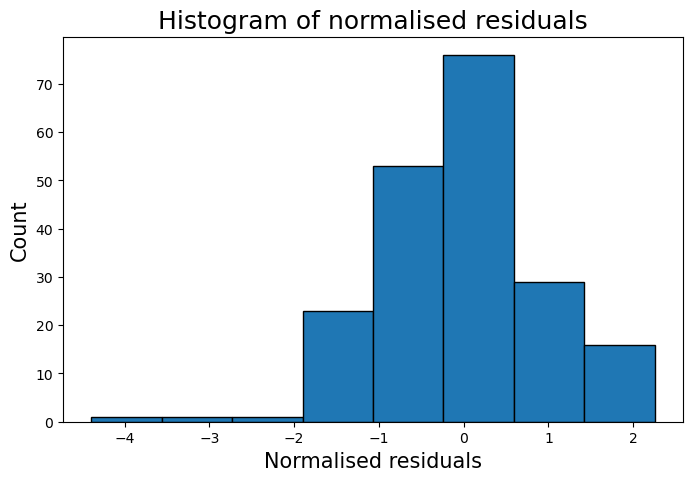

In [158]:
plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=8,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalised residuals',fontsize=15)
plt.title("Histogram of normalised residuals",fontsize=18)
plt.show()

# Q-Q plot of the residuals
A Q-Q plot, also known as a quantile-quantile plot, attempts to plot the theoretical quantiles of the standard normal distribution against the quantiles of the residuals. The one-to-one line, indicated in red below, is the ideal line, indicating normality. The closer the plotted points are to the red line, the closer the residual distribution is to the standard normal distribution.

<Figure size 800x500 with 0 Axes>

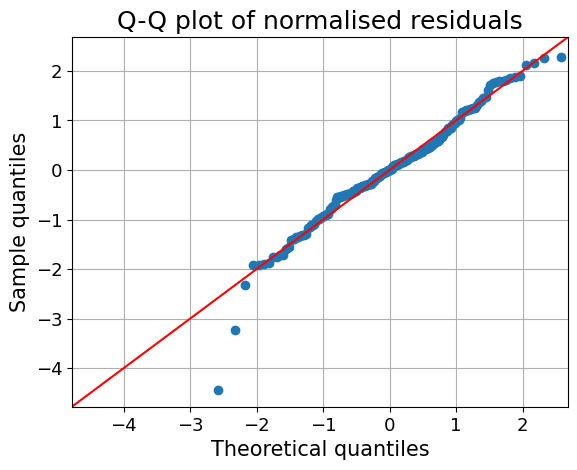

In [159]:
# We once again use the statsmodel library to assist us in producing our qqplot visualisation. 
from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(8,5))
fig=qqplot(fitted.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalised residuals",fontsize=18)
plt.grid(True)
plt.show()

# Checking for outliers in residuals
The last check we'll make is for outliers amongst the residuals.

Plotting Cook's Distance
Cook's distance is a calculation thar measures the effect of deleting an observation from the data. Observations with large Cook's distances should be earmarked for closer examination in the analysis due to their disproportionate impact on the model.

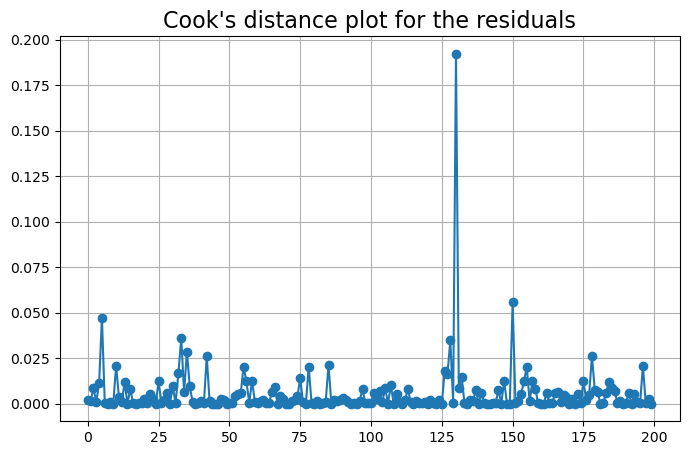

In [160]:
from statsmodels.stats.outliers_influence import OLSInfluence as influence

inf=influence(fitted)

(c, p) = inf.cooks_distance
plt.figure(figsize=(8, 5))
plt.title("Cook's distance plot for the residuals", fontsize=16)
plt.plot(np.arange(len(c)), c, marker='o', linestyle='-')
plt.grid(True)
plt.show()

# It does appear that observations approximately at 130 is highly influential in this dataset, and may warrant closer examination.

# VARIABLE SELECTION AND MODEL PERSISTENCE


Variables are the basic building blocks of datasets.

Variable selection and an in-depth knowledge of the domain you're building your model in remains essential when developing a predictive model.

Variable selection involves the elimination of some input variables which may in turn reduce the computational cost of modeling and, in some cases, improve the performance of the model.

Input variables - Referred to as the independent variables (IVs) and are used to explain or predict the target variable.

Target variable - Referred to as the dependent variable (DV) and is the target variable we want to predict.



# We will be using the personal_loans dataset which contains data of bank customers. 

In [161]:
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/bootcamps/Personal_Loans.csv')
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,Gender,Area,Personal Loan,Loan Size
0,26,2,60,2,3.0,Undergrad,132,0,0,0,Male,Alameda,1,15
1,26,0,83,3,3.9,Postgrad,0,0,0,1,Female,Ventura,1,30
2,26,0,129,3,0.7,Postgrad,0,0,0,0,Male,Los Angeles,1,33
3,26,0,132,3,6.5,Professional,0,0,0,0,Female,Orange,1,40
4,26,2,132,2,2.4,Professional,0,0,0,0,Male,Alameda,1,35


In [162]:
df.columns = [col.replace(" ","_") for col in df.columns]
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,Gender,Area,Personal_Loan,Loan_Size
0,26,2,60,2,3.0,Undergrad,132,0,0,0,Male,Alameda,1,15
1,26,0,83,3,3.9,Postgrad,0,0,0,1,Female,Ventura,1,30
2,26,0,129,3,0.7,Postgrad,0,0,0,0,Male,Los Angeles,1,33
3,26,0,132,3,6.5,Professional,0,0,0,0,Female,Orange,1,40
4,26,2,132,2,2.4,Professional,0,0,0,0,Male,Alameda,1,35


If we want to build some relationship between variables that are likely to indicate the loan amount once someone has taken a loan, we really only want to consider customers who actually took a personal loan to build this relationship:

In [163]:
df = df[df['Personal_Loan'] == 1]
df = df.drop(['Personal_Loan'],axis=1)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,Gender,Area,Loan_Size
0,26,2,60,2,3.0,Undergrad,132,0,0,0,Male,Alameda,15
1,26,0,83,3,3.9,Postgrad,0,0,0,1,Female,Ventura,30
2,26,0,129,3,0.7,Postgrad,0,0,0,0,Male,Los Angeles,33
3,26,0,132,3,6.5,Professional,0,0,0,0,Female,Orange,40
4,26,2,132,2,2.4,Professional,0,0,0,0,Male,Alameda,35


In [164]:

df.shape


(471, 13)

# Variable types and summary statistics


In this section, we will explore the data types and the summary statistics of our variables.

Variables have different levels of inherent statistical and model building information. They may generally be grouped into the following types as seen in the image* below:

You can copy the image URL below into a new tab to get the full size version to download

In [165]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url='https://raw.githubusercontent.com/Explore-AI/Pictures/master/Variable_data_types.jpg')

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 471 entries, 0 to 470
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 471 non-null    int64  
 1   Experience          471 non-null    int64  
 2   Income              471 non-null    int64  
 3   Family              471 non-null    int64  
 4   CCAvg               471 non-null    float64
 5   Education           471 non-null    object 
 6   Mortgage            471 non-null    int64  
 7   Securities_Account  471 non-null    int64  
 8   CD_Account          471 non-null    int64  
 9   Online              471 non-null    int64  
 10  Gender              471 non-null    object 
 11  Area                471 non-null    object 
 12  Loan_Size           471 non-null    int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 51.5+ KB


In [167]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,Loan_Size
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,45.205945,19.991507,144.811040,2.609342,3.901274,101.598726,0.125265,0.286624,0.607219,33.231423
std,11.626366,11.589427,31.761417,1.112902,2.098956,161.389361,0.331372,0.452665,0.488888,9.759205
min,26.000000,0.000000,60.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,35.000000,9.000000,122.000000,2.000000,2.600000,0.000000,0.000000,0.000000,0.000000,26.000000
50%,45.000000,20.000000,143.000000,3.000000,3.800000,0.000000,0.000000,0.000000,1.000000,32.000000
75%,55.000000,30.000000,172.000000,4.000000,5.350000,193.000000,0.000000,1.000000,1.000000,41.000000
max,65.000000,41.000000,203.000000,4.000000,10.000000,617.000000,1.000000,1.000000,1.000000,50.000000


# Dummy variable encoding

When we are building prediction model, it is important that all the varaibles values we have are in someway numeric
 So the rpocess we use to convert text data to numerical data is known as the one-hot encoding
 
 
 As observed in the above table, we get little information from the summary statistics of our numerical categorical data (Online, CD_Account, Securities_Account).

More importantly, all input data for regression model building purposes needs to be numerical.

We therefore have to transform the text data(found within columns such as Education, Gender, and Area) into numbers before we can train our machine learning model.

To facilitate this transformation from textual-categorical data to numerical equivalents, we use a pandas method called #get_dummies.

get_dummies will transform all the categorical text data into numbers by adding a column for each distinct category. The new column has:

# 1 for observations that were in this category.

# 0 for observations that were not in this category.

In [168]:
# Dummy variable encoding our dataset

df_dummies = pd.get_dummies(df)

# Again we make sure that all the column names have underscores instead of whitespaces
df_dummies.columns = [col.replace(" ","_") for col in df_dummies.columns]

df_dummies.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,Loan_Size,...,Area_San_Mateo,Area_Santa_Barbara,Area_Santa_Clara,Area_Santa_Cruz,Area_Shasta,Area_Solano,Area_Sonoma,Area_Stanislaus,Area_Ventura,Area_Yolo
0,26,2,60,2,3.0,132,0,0,0,15,...,False,False,False,False,False,False,False,False,False,False
1,26,0,83,3,3.9,0,0,0,1,30,...,False,False,False,False,False,False,False,False,True,False
2,26,0,129,3,0.7,0,0,0,0,33,...,False,False,False,False,False,False,False,False,False,False
3,26,0,132,3,6.5,0,0,0,0,40,...,False,False,False,False,False,False,False,False,False,False
4,26,2,132,2,2.4,0,0,0,0,35,...,False,False,False,False,False,False,False,False,False,False


In [169]:
df_dummies.shape

(471, 44)

# Correlations and model structure

Using the dummy variable dataframe, we can build a model that predicts Loan_Size (our dependent variable) as a function of 43 different independent variables.

Before we do this, however, let's reorder columns so that our dependent variable is the last column of the dataframe:

In [170]:
column_titles = [col for col in df_dummies.columns if col != 'Loan_Size'] + ['Loan_Size']


In [171]:
df_dummies = df_dummies.reindex(columns=column_titles)
df_dummies


,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,Education_Postgrad,...,Area_Santa_Barbara,Area_Santa_Clara,Area_Santa_Cruz,Area_Shasta,Area_Solano,Area_Sonoma,Area_Stanislaus,Area_Ventura,Area_Yolo,Loan_Size
0,26,2,60,2,3.0,132,0,0,0,False,...,False,False,False,False,False,False,False,False,False,15
1,26,0,83,3,3.9,0,0,0,1,True,...,False,False,False,False,False,False,False,True,False,30
2,26,0,129,3,0.7,0,0,0,0,True,...,False,False,False,False,False,False,False,False,False,33
3,26,0,132,3,6.5,0,0,0,0,False,...,False,False,False,False,False,False,False,False,False,40
4,26,2,132,2,2.4,0,0,0,0,False,...,False,False,False,False,False,False,False,False,False,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,65,39,170,3,7.9,99,0,1,1,False,...,False,False,False,False,False,False,False,False,False,48
467,65,41,170,4,6.1,0,0,1,1,True,...,False,False,False,False,False,False,False,False,False,42
468,65,39,184,1,5.4,176,0,1,1,False,...,False,False,False,False,False,False,False,False,False,29
469,65,41,185,3,2.0,0,0,0,0,True,...,False,False,False,False,False,False,False,False,False,46


# Create and visualise the correlation matrix
This makes a heatmap visualisation representing a correlation matrix of our data easier to interpret:

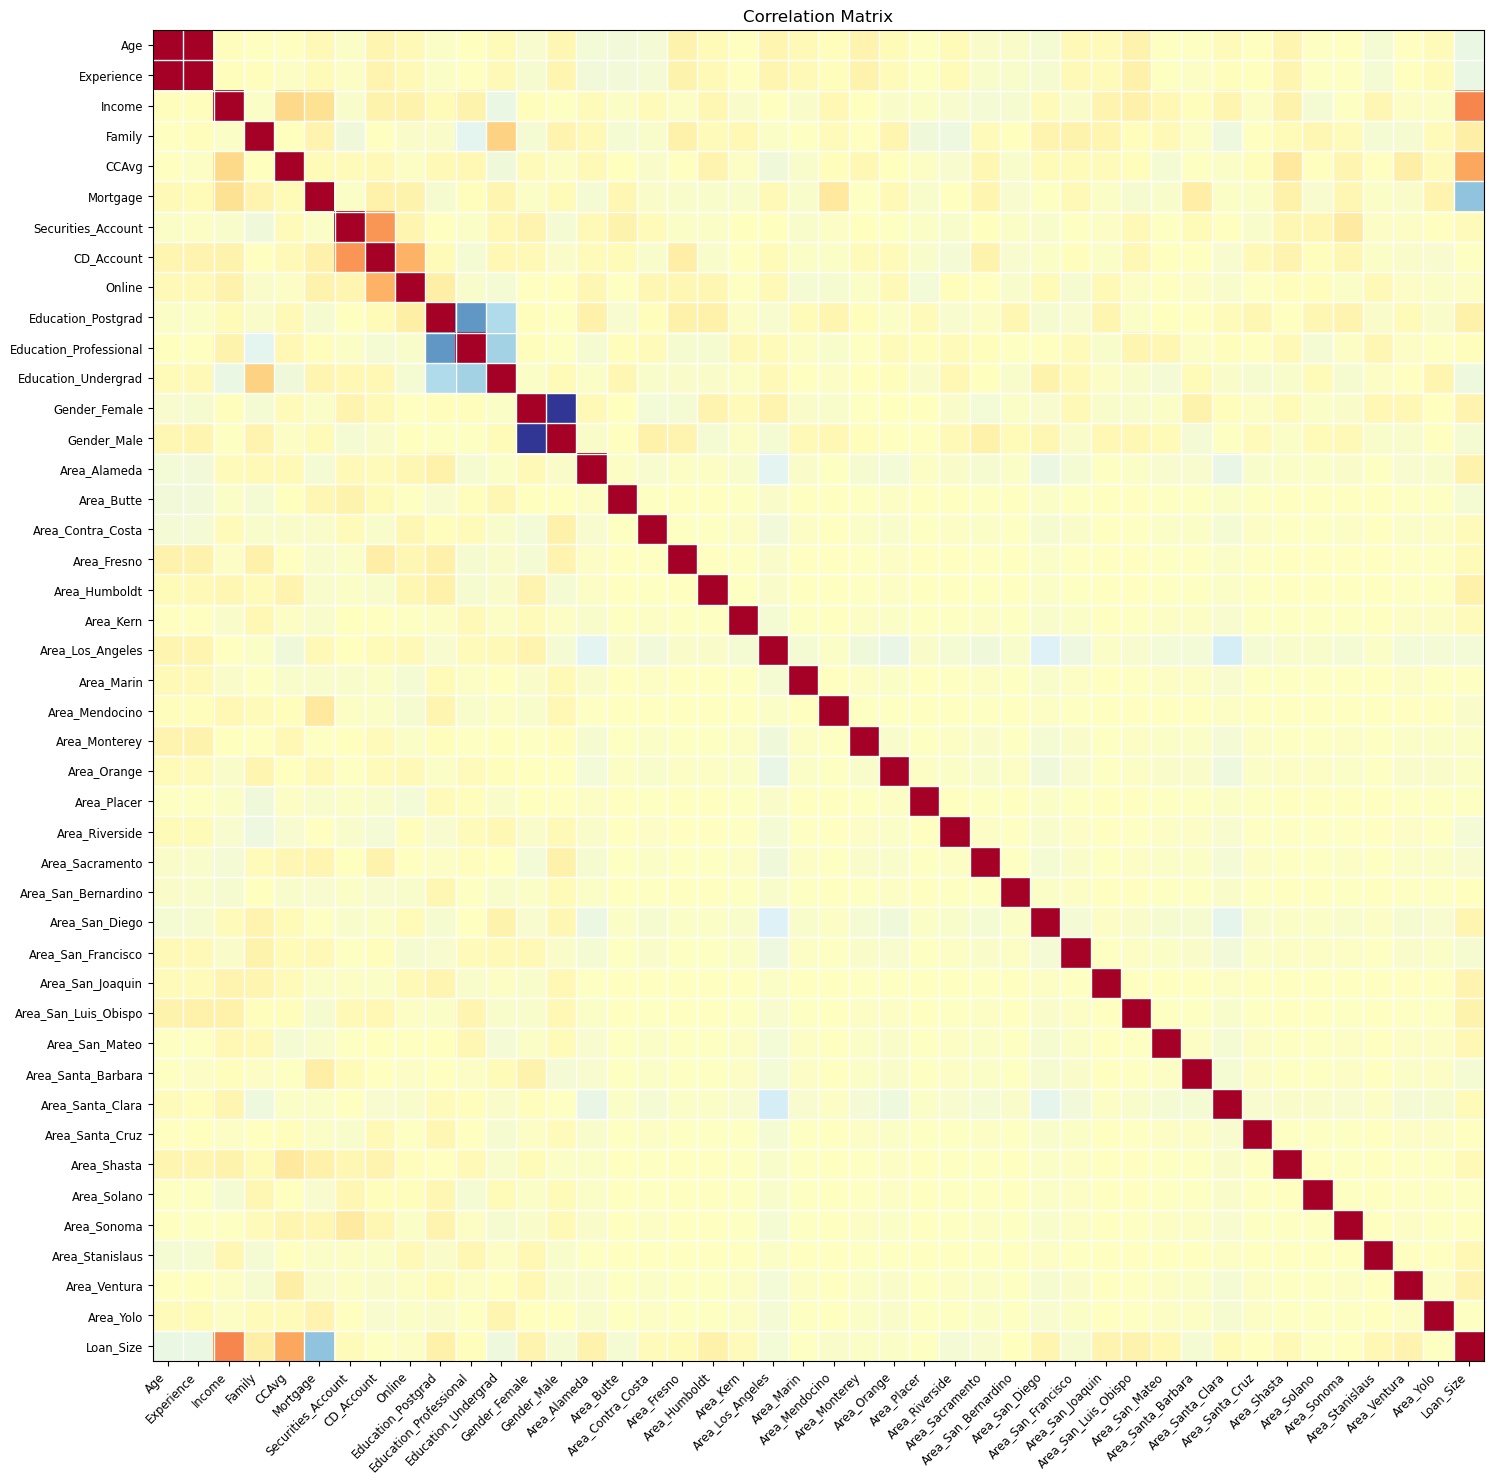

In [172]:
#The correlation matrix
df_dummies.corr()
# The correlation heatmap
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df_dummies.corr(), xnames = df_dummies.corr().columns, ax = ax);

# We can see from the correlations that it's not the best idea to keep all of the dummy variables.

If we use all of these variables, we're effectively working with superfluous or redundant information.

Our model will also have collinearity issues:

Gender_Male and Gender_Female are perfectly negatively correlated
This will likely be a problem when we build a model - let's check what an OLS model summary says.

# Fitting the model using statsmodels.OLS
Generating the regression string
We will be importing the statsmodels library which has a rich set of statistical tools to help us.

statsmodels works in a similar way, so we need to generate an appropriate string to feed to the method when we wish to fit the model.

In [173]:
from statsmodels.formula.api import ols

# Model DataFrame with all of the columns:
df2 = df_dummies.copy()

# The dependent variable:
y_name = 'Loan_Size'

# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in df2.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

Formula:
	 Loan_Size ~ Age + Experience + Income + Family + CCAvg + Mortgage + Securities_Account + CD_Account + Online + Education_Postgrad + Education_Professional + Education_Undergrad + Gender_Female + Gender_Male + Area_Alameda + Area_Butte + Area_Contra_Costa + Area_Fresno + Area_Humboldt + Area_Kern + Area_Los_Angeles + Area_Marin + Area_Mendocino + Area_Monterey + Area_Orange + Area_Placer + Area_Riverside + Area_Sacramento + Area_San_Bernardino + Area_San_Diego + Area_San_Francisco + Area_San_Joaquin + Area_San_Luis_Obispo + Area_San_Mateo + Area_Santa_Barbara + Area_Santa_Clara + Area_Santa_Cruz + Area_Shasta + Area_Solano + Area_Sonoma + Area_Stanislaus + Area_Ventura + Area_Yolo


In [174]:
# fitting the model
# Fit the model using the model dataframe
model=ols(formula=formula_str, data=df2)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:              Loan_Size   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     37.56
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          1.71e-115
Time:                        19:50:54   Log-Likelihood:                -1387.0
No. Observations:                 471   AIC:                             2856.
Df Residuals:                     430   BIC:                             3026.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

# We can see that there is a warning about strong multicollinearity. This is likely as a result of the incorrect filtering of one hot encoded dummy variables (we noticed earlier that Gender_Male and Gender_Female are perfectly negatively correlated



Repeat dummy variable encoding with drop_first parameter
In order to ensure that we don't assume an underlying relationship between the categories, we can call pd.get_dummies with the argument drop_first=True so that we only create n-1 columns for each variable with n categories (i.e. one variable/column with five categories will be transformed into four columns of 0's and 1's).

In [175]:
df_dummies = pd.get_dummies(df, drop_first=True)

# Again make sure that all the column names have underscores instead of whitespaces
df_dummies.columns = [col.replace(" ", "_") for col in df_dummies.columns]

# Reorder columns with the dependent variable (claim_amount) the last column
column_titles = [col for col in df_dummies.columns if col !=
                 'Loan_Size'] + ['Loan_Size']
df_dummies = df_dummies.reindex(columns=column_titles)

df_dummies.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,Education_Professional,...,Area_Santa_Barbara,Area_Santa_Clara,Area_Santa_Cruz,Area_Shasta,Area_Solano,Area_Sonoma,Area_Stanislaus,Area_Ventura,Area_Yolo,Loan_Size
0,26,2,60,2,3.0,132,0,0,0,False,...,False,False,False,False,False,False,False,False,False,15
1,26,0,83,3,3.9,0,0,0,1,False,...,False,False,False,False,False,False,False,True,False,30
2,26,0,129,3,0.7,0,0,0,0,False,...,False,False,False,False,False,False,False,False,False,33
3,26,0,132,3,6.5,0,0,0,0,True,...,False,False,False,False,False,False,False,False,False,40
4,26,2,132,2,2.4,0,0,0,0,True,...,False,False,False,False,False,False,False,False,False,35


In [176]:
df_dummies.shape

(471, 41)

In [177]:
# We'll keep the model DataFrame, but only specify the columns we want to fit this time
X_names = [col for col in df_dummies.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+' ~ '+'+'.join(X_names)

# Fit the model using the model dataframe
model = ols(formula=formula_str, data=df2)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:              Loan_Size   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     37.56
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          1.71e-115
Time:                        19:50:54   Log-Likelihood:                -1387.0
No. Observations:                 471   AIC:                             2856.
Df Residuals:                     430   BIC:                             3026.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

We see that the condition number has improved, but there is still mention of strong multicollinearity in warning [2]

We also see that the Q1 - Q3 range of coefficients and expected errors are larger than the absolute size of the coefficients themselves.

Let's make further selections on the variables now using their significance.

# variable selection by correlation and significance

In [178]:
# Calculate correlations between predictor variables and the response variable
corrs = df_dummies.corr()['Loan_Size'].sort_values(ascending=False)
corrs

Loan_Size                 1.000000
Income                    0.522566
CCAvg                     0.420913
Family                    0.097280
Area_Humboldt             0.078831
Area_San_Luis_Obispo      0.076123
Area_San_Joaquin          0.069877
Area_Ventura              0.064104
Area_San_Diego            0.054835
Area_San_Mateo            0.041827
Area_Stanislaus           0.041488
Area_Shasta               0.033688
Area_Santa_Clara          0.027144
Area_Fresno               0.025244
Securities_Account        0.022597
Area_Contra_Costa         0.021040
Area_Kern                 0.018683
Education_Professional    0.008472
Area_San_Bernardino       0.006312
Area_Sonoma              -0.002697
Area_Santa_Cruz          -0.002916
Area_Placer              -0.008249
Area_Yolo                -0.009862
CD_Account               -0.011676
Area_Solano              -0.012851
Area_Marin               -0.014348
Online                   -0.019705
Area_Orange              -0.024388
Area_Monterey       

In [179]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'Loan_Size']

for col in column_titles:
    p_val = round(pearsonr(df_dummies[col], df_dummies['Loan_Size'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}

df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

,Correlation_Coefficient,P_Value
Income,0.522566,0.000000
Mortgage,-0.496354,0.000000
CCAvg,0.420913,0.000000
Experience,-0.131946,0.004124
Age,-0.130709,0.004492
Education_Undergrad,-0.107046,0.020143
Family,0.097280,0.034806
Area_Los_Angeles,-0.079507,0.084773
Area_Humboldt,0.078831,0.087459
Area_San_Luis_Obispo,0.076123,0.098929


# Keeping the statistically significant features
If we were to use a logic test with a significance value of 5% (p-value < 0.05), we could infer that the following features are statistically significant:

Income
Mortgage
CCAvg
Experience
Age
Education_Undergrad
Family
Let's keep only the variables that have a significant correlation with the dependent variable. We'll put them into an independent variable DataFrame X:

In [180]:
# The dependent variable remains the same:
y_data = df_dummies[y_name]  # y_name = 'Loan_Size'

# Model building - Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X_data = df_dummies[X_names]

# Finding and removing the highly correlated features
We also need to look for predictor variable pairs which have a high correlation with each other to avoid autocorrelation.

In [181]:
# As before, we create the correlation matrix
# and find rows and columns where correlation coefficients > 0.9 or <-0.9
corr = X_data.corr()
r, c = np.where(np.abs(corr) > 0.9)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

,Experience,Age
Age,0.994515,1.000000
Experience,1.000000,0.994515


In [182]:
# OLS fit summary
#Now let's see what the resulting OLS fit summary says:

# Lets take a new subset of our potential independent variables
X_remove = ['Age']
X_corr_names = [col for col in X_names if col not in X_remove]

# Create our new OLS formula based-upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
print('Formula:\n\t{}'.format(formula_str))


# Fit the OLS model using the model dataframe
model=ols(formula=formula_str, data=df2)
fitted = model.fit()

# Display the fitted summary
print(fitted.summary())

Formula:
	Loan_Size ~ Income + CCAvg + Family + Education_Undergrad + Experience + Mortgage
                            OLS Regression Results                            
Dep. Variable:              Loan_Size   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     251.1
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          3.07e-142
Time:                        19:50:54   Log-Likelihood:                -1400.3
No. Observations:                 471   AIC:                             2815.
Df Residuals:                     464   BIC:                             2844.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------

# Variable selection by variance thresholds

Variance Thresholds remove features whose values don't change much from observation to observation.

The objective here is to remove all features that have a variance lower than the selected threshold.

For example, suppose that in our loans dataset 97% of observations were for 40-year-old women, then the Age and Gender features can be removed without a great loss in information.

Note: Variance is dependent on scale, so the features will have to be normalized before implementing variance thresholding.

In [183]:
# Separate data into independent (X) and independent (y) variables
X_names = list(df_dummies.columns)
X_names.remove(y_name)
X_data = df_dummies[X_names]
y_data = df_dummies[y_name]

In [184]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)

# Variance Threshold in Scikit Learn
To implement Variance Threshold in Scikit Learn we have to do the following:

Import and create an instance of the VarianceThreshold class
Use the .fit() method to select subset of features based on the threshold.

In [185]:
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

VarianceThreshold(threshold=0.03)

In [186]:
# Get column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

,Variable_Name,Variance
11,Gender_Male,0.249945
9,Education_Professional,0.244941
8,Online,0.238504
7,CD_Account,0.204471
17,Area_Los_Angeles,0.179002
10,Education_Undergrad,0.155877
3,Family,0.137325
32,Area_Santa_Clara,0.130968
6,Securities_Account,0.109574
26,Area_San_Diego,0.109574


In [187]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
X_var_names = X_new.columns

# View first few entries
X_new.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,Education_Professional,Education_Undergrad,Gender_Male,Area_Los_Angeles,Area_Monterey,Area_Orange,Area_Sacramento,Area_San_Diego,Area_San_Francisco,Area_Santa_Clara
0,0.0,0.04878,0.000000,0.333333,0.30,0.213938,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00000,0.160839,0.666667,0.39,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00000,0.482517,0.666667,0.07,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00000,0.503497,0.666667,0.65,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.04878,0.503497,0.333333,0.24,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [188]:
X_new.shape

(471, 19)

In [189]:
# Create Variance Threshold objects
selector_1 = VarianceThreshold(threshold=0.05)
selector_2 = VarianceThreshold(threshold=0.1)
selector_3 = VarianceThreshold(threshold=0.15)
selector_1.fit(X_normalize)
selector_2.fit(X_normalize)
selector_3.fit(X_normalize)
# Select subset of columns
X_1 = X_normalize[X_normalize.columns[selector_1.get_support(indices=True)]]
X_2 = X_normalize[X_normalize.columns[selector_2.get_support(indices=True)]]
X_3 = X_normalize[X_normalize.columns[selector_3.get_support(indices=True)]]

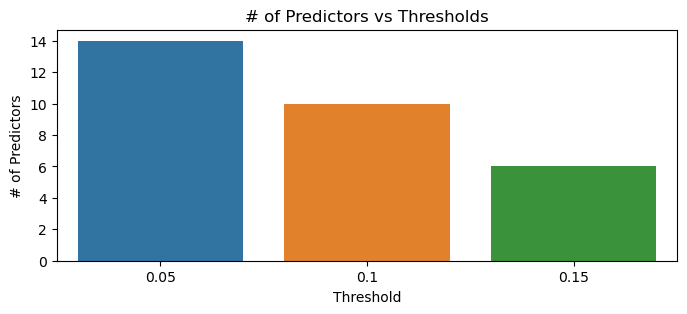

In [190]:
# Create figure and axes
f, ax = plt.subplots(figsize=(8, 3), nrows=1, ncols=1)

# Create list of titles and predictions to use in for loop
subset_preds = [X_1.shape[1], X_2.shape[1], X_3.shape[1]]
thresholds = ['0.05', '0.1', '0.15']

# Plot graph
ax.set_title('# of Predictors vs Thresholds')
ax.set_ylabel('# of Predictors')
ax.set_xlabel('Threshold')
sns.barplot(x=thresholds, y=subset_preds)
plt.show()

In [191]:
# What is our new OLS formula?
formula_str = y_name+' ~ '+' + '.join(X_new.columns)
print('Formula:\n\t{}'.format(formula_str))
# Fit the model using the model dataframe
model = ols(formula=formula_str, data=df_dummies)
fitted = model.fit()

print(fitted.summary())

Formula:
	Loan_Size ~ Age + Experience + Income + Family + CCAvg + Mortgage + Securities_Account + CD_Account + Online + Education_Professional + Education_Undergrad + Gender_Male + Area_Los_Angeles + Area_Monterey + Area_Orange + Area_Sacramento + Area_San_Diego + Area_San_Francisco + Area_Santa_Clara
                            OLS Regression Results                            
Dep. Variable:              Loan_Size   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     81.28
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          2.65e-132
Time:                        19:50:54   Log-Likelihood:                -1390.6
No. Observations:                 471   AIC:                             2821.
Df Residuals:                     451   BIC:                             2904.
Df Model:                          19                           

# Train and compare models on the reduced datasets

In [192]:
# Train-test split the original dataset
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.20,
                                                    shuffle=False)
# Get training and testing data for variance threshold model
X_var_train = X_train[X_var_names]
X_var_test = X_test[X_var_names]

In [193]:
# Get training and testing data for correlation threshold model
X_corr_train = X_train[X_corr_names]
X_corr_test = X_test[X_corr_names]

# fitting in the models

In [194]:
# Instantiate the models
lm = LinearRegression()
lm_corr = LinearRegression()
lm_var = LinearRegression()
# Fit the models
lm.fit(X_train, y_train);
lm_corr.fit(X_corr_train,y_train);
lm_var.fit(X_var_train,y_train);

In [195]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression

# Assuming models are already instantiated and fitted

# Intercepts
intercepts = {
    'lm': lm.intercept_,
    'lm_corr': lm_corr.intercept_,
    'lm_var': lm_var.intercept_
}

# Coefficients
coefficients = {
    'lm': lm.coef_,
    'lm_corr': lm_corr.coef_,
    'lm_var': lm_var.coef_
}

print("Intercepts:")
for model, intercept in intercepts.items():
    print(f"{model}: {intercept}")

print("\nCoefficients:")
for model, coef in coefficients.items():
    print(f"{model}: {coef}")


Intercepts:
lm: 14.585490507193057
lm_corr: 5.755890703876197
lm_var: 13.756400224167287

Coefficients:
lm: [-3.22525281e-01  1.85848270e-01  1.69893862e-01  1.34988454e+00
  1.42086932e+00 -3.61654104e-02  1.17842740e+00 -3.70323422e-01
 -1.29320813e-01 -2.84400837e-01 -7.05817250e-02 -8.63928475e-01
 -3.77703662e+00 -1.14044472e+00  2.22044605e-15  4.63665972e-01
  9.90267618e-02 -9.03812145e-01  9.14785262e-01  3.99807413e+00
 -1.88395043e+00  3.93120352e-01 -2.12863775e-01 -3.79588262e-01
  1.37131394e-01 -1.37197996e+00  2.85950008e-01 -1.60011821e+00
  2.06653878e+00 -1.82461749e+00 -3.24933389e-02 -1.48906641e-01
  4.03209109e-01 -4.25731389e-01 -2.40498379e+00 -2.05848421e+00
  4.74335142e-01 -1.08971273e+00  1.35612055e+00  1.11861523e+00]
lm_corr: [ 0.16974356  1.42987683  1.31727486  0.04415516 -0.13897059 -0.03624278]
lm_var: [-0.29490912  0.16264522  0.17055465  1.35225803  1.41671952 -0.03602655
  1.14868589 -0.45285043 -0.17156488 -0.40029643 -0.16621363 -0.91950307
 -0.

# Assess the accuracy of the models

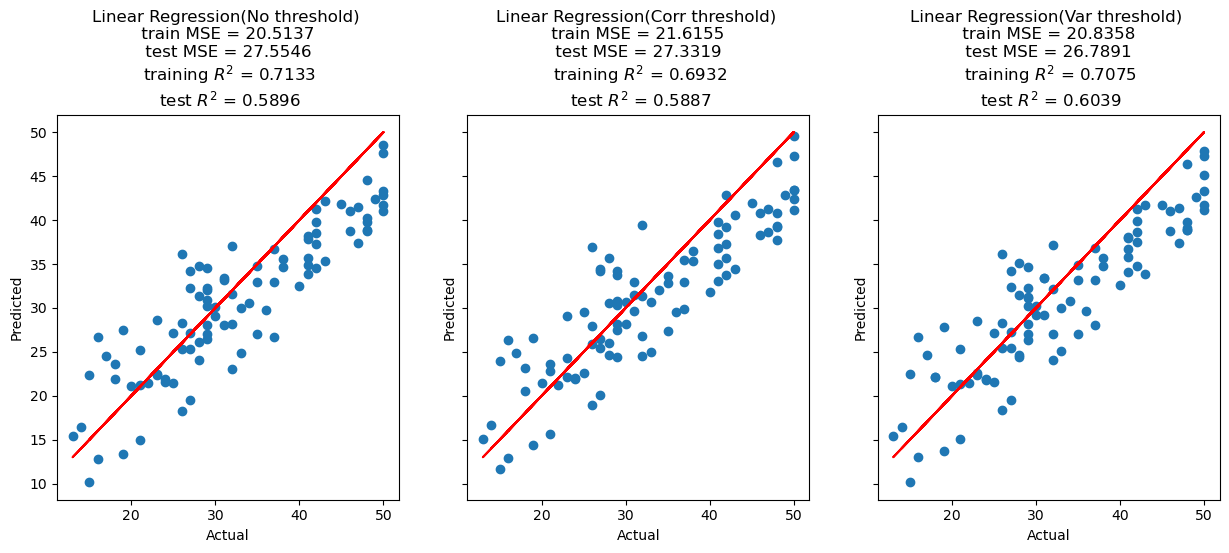

In [196]:
from sklearn.metrics import mean_squared_error, r2_score

# Create figure and axes
f, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=3, sharey=True)

# Create list of titles and predictions to use in for loop
train_pred = [lm.predict(X_train),
              lm_corr.predict(X_corr_train),
              lm_var.predict(X_var_train)]
test_pred = [lm.predict(X_test),
             lm_corr.predict(X_corr_test),
             lm_var.predict(X_var_test)]
title = ['No threshold', 'Corr threshold', 'Var threshold']

# Key:
# No threshold - linear regression with all predictive variables
# Corr threshold - linear regression with correlation thresholded predictive variables
# Var threshold - linear regression with variance thresholded predictive variables


# Loop through all axes to plot each model's results
for i in range(3):
    test_mse = round(mean_squared_error(test_pred[i], y_test), 4)
    test_r2 = round(r2_score(test_pred[i], y_test), 4)
    train_mse = round(mean_squared_error(train_pred[i], y_train), 4)
    train_r2 = round(r2_score(train_pred[i], y_train), 4)
    title_str = f"Linear Regression({title[i]}) \n train MSE = {train_mse} \n " + \
                f"test MSE = {test_mse} \n training $R^{2}$ = {train_r2} \n " + \
                f"test $R^{2}$ = {test_r2}"
    ax[i].set_title(title_str)
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test, y_test, 'r')
    ax[i].scatter(y_test, test_pred[i])

In [197]:
# Create the correlation matrix
corr = X_data.corr()

# Find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr[np.abs(corr) > 0.9]

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,Education_Professional,...,Area_San_Mateo,Area_Santa_Barbara,Area_Santa_Clara,Area_Santa_Cruz,Area_Shasta,Area_Solano,Area_Sonoma,Area_Stanislaus,Area_Ventura,Area_Yolo
Age,1.000000,0.994515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Experience,0.994515,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCAvg,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mortgage,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Securities_Account,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CD_Account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Online,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Professional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# SAVING MODEL

After training a model it is useful to be able to store it in order to move rapidly and make predictions going forward

By saving , we mean saving tuned tuned parameters from within the model as well as the type of model(y=ax+b- here we save the a and the b and the type of the model i.e linear regression)

# Therefore, the goal is to:
save the trained model to a file
restore a saved model and use it to make predictions


# We use Object Serailisation

This  involes storing values of the variable

it is the process of storing variables values to a file which is better than storing an entire python script

Once a model is trained, it is best to separate the model from the training code and use it to make predictions going forward. This ensures the model is lightweight and efficient to put into production.

We often do this by 'saving' the model:

Saving a model entails storing its parameters and all information needed to make predictons.

# We store it using pickle.
The files are called pickles and the process is called pickiling

In [198]:
# reading the dataset
dataset2 = pd.read_csv("advertising.csv")

In [199]:
dataset2.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [200]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [201]:
dataset2.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [202]:
# Setting the values for independent (X) variable and dependent (Y) variable
#Setting the value for X and Y

X = dataset2[['TV', 'Radio', 'Newspaper']]
y = dataset2['Sales']

# Training the model
Let's start by training a model that we can save later. We'll build a multiple linear regression model on the Sklearn's internal dataset.

Preprocessing
Having reviewed the data, we now perform a minimal amount of preprocessing to prepare for model fitting and evaluation:



In [203]:

# split into train and test
# import train/test split module
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)

# model fitting and evaluation

In [204]:
# define the model 
model = LinearRegression()

# fit the model 
model.fit(X_train, y_train)

# get predictions on the test set 
y_pred = model.predict(X_test)

# calculate performance metrics
print("MSE:",mean_squared_error(y_test, y_pred))

MSE: 2.4093336128923686


**The label is set to "$y$". The dollar sign ($) around the 'y' is used to denote mathematical notation,
indicating that 'y' represents a variable in an equation or formula.**

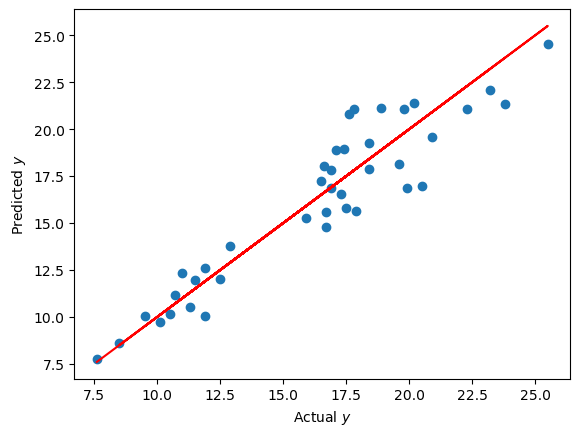

In [205]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,"r") # perfect model line
plt.ylabel("Predicted $y$")
plt.xlabel("Actual $y$")
plt.show()

# Object Serialization

Object serialization is the storing of variables and their values as a file.

In the context of machine learning models, this means we have to re-train your models on the original train data before we can use them on other unseeen data.

Object serialization allows us to store our variables and their state as a file, which upon loading can restore the variable and the value it had when we saved it.

This way, we can save our sklearn models along with their optimal parameters and load them later for reuse.

In this train, we will explore pickle, a common python library for object serialization.

In [206]:
# Saving the model with Pickle
# Importing the pickle library
import pickle

# Save the model just like we would a Python file
model_save_path = "mlr_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(model,file)

This creates a portable model.pkl file in the specified file path which we can move between computers, email to others, use for model versioning, etc. We can also use this file to make predictions in the future.

In [207]:
# Restoring the model with Pickle

# restore the model just like we would read a file
model_load_path = "mlr_model.pkl"
with open(model_load_path,'rb') as file:
    unpickled_model = pickle.load(file)

# Using the model file to make predictions
NB: Imagine that we are now starting on a new Jupyter Notebook and this was all we put in it. You will notice there is no data and no training in the code since the model is already trained and the training data is no longer needed.

All that's left now is to load the data into the model and get predictions:

In [208]:
# get predictions from unpickled model
y_pred = unpickled_model.predict(X_test)

In [209]:
# calculate performance metrics
print("MSE:",mean_squared_error(y_test, y_pred))

MSE: 2.4093336128923686




# REGULARISATION


Scaling data is crucial when preparing it for machine learning models, especially for those that involve regularisation. Regularisation techniques, such as L1 (Lasso) and L2 (Ridge) regularisation, adjust model complexity by applying penalties to the coefficients of predictors. The magnitude of these penalties is influenced by the scale of the predictors, making scaling an essential step to ensure fairness and effectiveness in regularisation. Essentially, if the features are on different scales, the model might unfairly penalise smaller scale features more than those on a larger scale. Therefore, to apply regularisation uniformly across all features, we must standardise their scales.

# WE scale by using noemlaization and standardization
 # Normalisation
 otherwise known as min-max normalisation: squeezing your data into the range  [0,1]
 . Through normalisation, the maximum value of a variable becomes one, the minimum becomes zero, and the values in-between become decimals between zero and one.
 # Standardisation
Z-score standardisation, or simply standardisation, on the other hand, does not suffer from this drawback as it handles outliers gracefully.

As a trade-off to using this transformation, our variable is no longer contained within the  [0,1]
  range as it was during normalisation (in fact, it can now take on a range which includes negative values). This means that all our variables won't be bound to the exact same range (i.e. they can have slightly different influence levels on the learnt regression coefficients during regularisation), but they are far closer to one another then they were before the use of standardisation.

# Implementing Scaling
Let's see how we standardise the features. Sklearn makes rescaling easy. We'll import the StandardScaler() object from sklearn.preprocessing

In [238]:
# import scaler method from sklearn
from sklearn.preprocessing import StandardScaler

In [239]:
# create scaler object
scaler = StandardScaler()
# create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X)
# convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()

,TV,Radio,Newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802


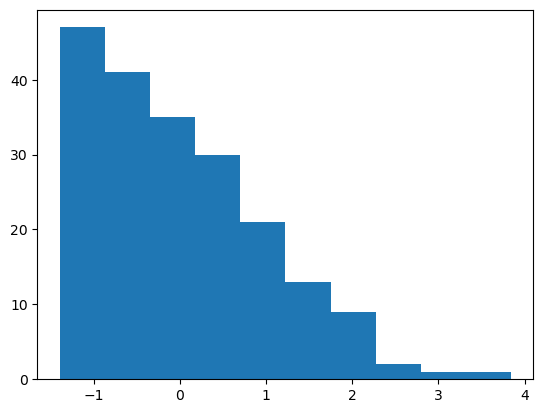

In [240]:
plt.hist(X_standardise['Newspaper'])
plt.show()

# the standard error within each variable in the data is now equal to one.

In [243]:

X_standardise.describe().loc['std']


TV           1.002509
Radio        1.002509
Newspaper    1.002509
Name: std, dtype: float64

# Implementing min-max normalisation
Let's see how we normalise the features. Sklearn makes rescaling easy. We'll import the MinMaxScaler() object from sklearn.preprocessing

In [244]:
# import scaler method from sklearn
from sklearn.preprocessing import MinMaxScaler
# create scaler object
scaler = MinMaxScaler()
# create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X)
# convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()

,TV,Radio,Newspaper
0,0.775786,0.762097,0.605981
1,0.148123,0.792339,0.394019
2,0.055800,0.925403,0.606860
3,0.509976,0.832661,0.511873
4,0.609063,0.217742,0.510994


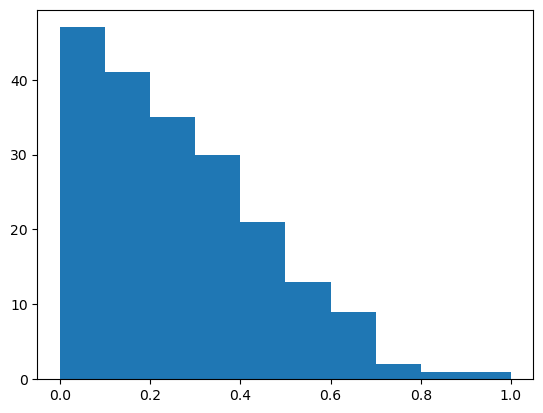

In [245]:
plt.hist(X_standardise['Newspaper'])
plt.show()

# we can see that normalising the data put it neatly between 0 and 1.

In [246]:
X_standardise.describe().loc['std']

TV           0.290342
Radio        0.299331
Newspaper    0.191545
Name: std, dtype: float64

# REGULARIZATION

Technique that we use alongside our regresion model to try and improve them



# RIDGE REGULIARIZATION

The goal of ridge regulzarization is that it shrinks the regression coefficeints, so that variables, with minor contribution to the outcom ehave their coeffiencts close to zero.

The shrinkage of the coefficients is acheived by penalizing the regression model with a penalty term called L2-Norm, which is the sum of squared coeffients

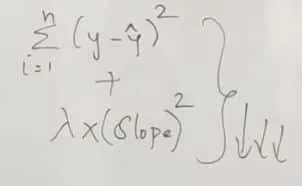
where λ*(slope)² is the penalty factor that shrinks the coefficients closer to zero , but not exactly zero. The amount of the penalty can be fine-tuned using a constant called lambda (λ). Selecting a good value for λ is critical.

Ridge shrinks the slope of those predictors(features) who contribute very less in the model close to zero but not exactly zero as lasso does.
Ridge selects group of collinear features. We can use Ridge when there is strong relationship between features.
When λ=0, the penalty term has no effect, and ridge regression will produce the classical least square coefficients. As lambda gets larger, the bias is unchanged but the variance drops. However, as λ increases to infinite, the impact of the shrinkage penalty grows, and the ridge regression coefficients will get close to zero.

The drawback of ridge is that it doesn’t select variables. Ridge keeps all variables and shrinks the coefficients towards zero.

# For our analysis, we'll start by dividing our dataset into a training set and a testing set. 

After splitting our dataset, we'll proceed to fit and evaluate our model. Initially, we'll create a Ridge() object using the default parameter settings, which means we'll start with an  alpha
  value of 1. This alpha parameter controls the strength of the regularisation applied to our model, with higher values leading to more significant regularisation. In a later tutorial, we'll learn about choosing a better value for this hyperparameter.

In [247]:
 #Import train/test splitting function from sklearn
from sklearn.model_selection import train_test_split

In [248]:
# Import scaler method from sklearn
from sklearn.preprocessing import StandardScaler
# Create scaler object
scaler = StandardScaler()
# Create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X)
# Convert the scaled predictor values into a DataFrame
X_standardised = pd.DataFrame(X_scaled, columns=X.columns)
X_standardised.head()

,TV,Radio,Newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802


In [249]:
 #Split the data into train and test, being sure to use the standardised predictors
X_train, X_test, y_train, y_test = train_test_split(X_standardised,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=True)

In [250]:
# Import the ridge regression module from sklearn
from sklearn.linear_model import Ridge
# Create ridge model with alpha = 1
ridge = Ridge(alpha=1)
# Train the model
ridge.fit(X_train, y_train)

Ridge(alpha=1)

In [251]:
# Extract the model intercept value (the predicted value when all predictor variables are zero.)
b0 = float(ridge.intercept_)
# Extract the model coefficient value
coeff = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])
print("Intercept:", float(b0))
# Check out the coefficients (coefficients represent the change in the response variable for a one-unit change in the respective predictor variable,
# holding all other predictors constant.)
coeff

Intercept: 15.148350248895303


,Coefficient
TV,4.610146
Radio,1.676255
Newspaper,-0.076343


# Assess the predictive accuracy of the model

In [252]:
# Fit a basic linear model
from sklearn.linear_model import LinearRegression

# Create model object
lmr = LinearRegression()

# Train model
lmr.fit(X_train, y_train)

LinearRegression()

In [253]:
#Import metrics module
from sklearn import metrics
# Check training accuracy
train_lmr = lmr.predict(X_train)
train_ridge = ridge.predict(X_train)

print('Training MSE')
print('Linear:', metrics.mean_squared_error(y_train, train_lmr))
print('Ridge :', metrics.mean_squared_error(y_train, train_ridge))

Training MSE
Linear: 2.812312371579188
Ridge : 2.8132497001526273


Both the linear regression model and the Ridge regression model have similar training MSE values, 
with the Ridge regression model having a slightly higher MSE. 
This suggests that both models perform similarly on the training data in terms of MSE. 
However, it's essential to consider other metrics and possibly cross-validation to assess the models' 
generalization performance accurately.

In [254]:
test_lmr = lmr.predict(X_test)
test_ridge = ridge.predict(X_test)

print('Testing MSE')
print('Linear:', metrics.mean_squared_error(y_test, test_lmr))
print('Ridge :', metrics.mean_squared_error(y_test, test_ridge))

Testing MSE
Linear: 2.344386948777866
Ridge : 2.342087737703763


Ridge regression model performs slightly better than the linear regression model on the testing data, as it has a slightly lower MSE. However, the difference in MSE between the two models is relatively small.

When interpreting these results, it's important to consider that the testing MSE provides insights into how well the models generalize to new, unseen data. Lower MSE values indicate better predictive performance

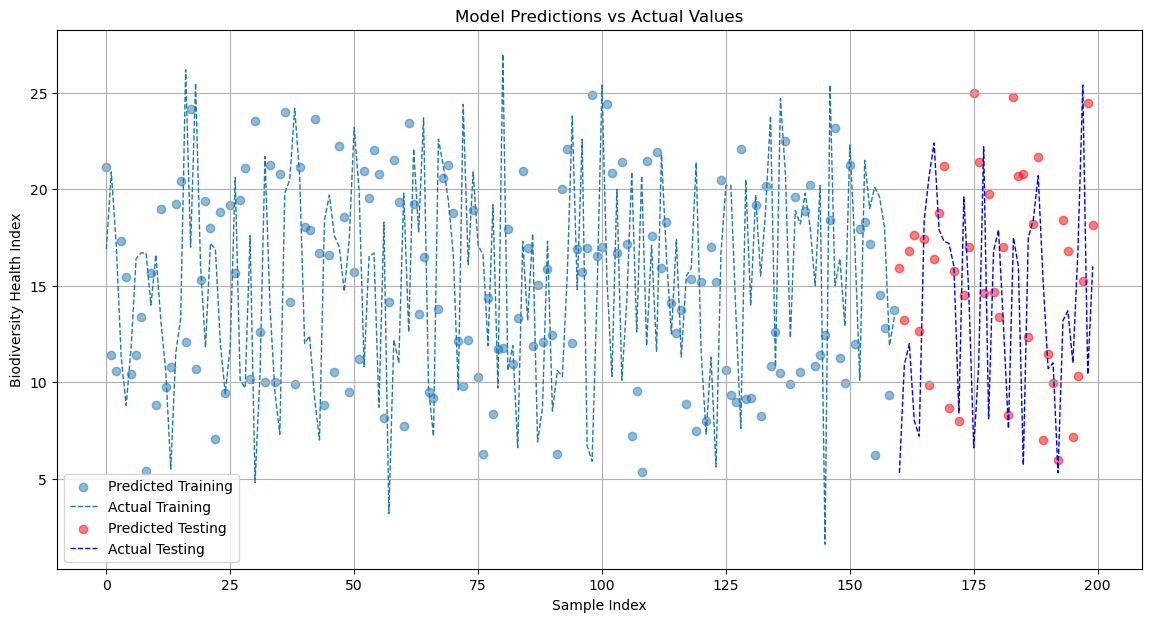

In [255]:
# plotting the results
#Predictions
y_pred_train = ridge.predict(X_standardised.iloc[:len(y_train)])
y_pred_test = ridge.predict(X_standardised.iloc[len(y_train):])

plt.figure(figsize=(14, 7))  # Plot size

# Plot training predictions and actual values
plt.scatter(np.arange(len(y_train)), y_pred_train, label='Predicted Training', alpha=0.5)
plt.plot(np.arange(len(y_train)), y_train, label='Actual Training', linestyle='--', linewidth=1)

# Plot testing predictions and actual values
plt.scatter(np.arange(len(y_test)) + len(y_train), y_pred_test, label='Predicted Testing', alpha=0.5, color='red')
plt.plot(np.arange(len(y_test)) + len(y_train), y_test, label='Actual Testing', linestyle='--', linewidth=1, color='blue')

plt.legend()
plt.title('Model Predictions vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Biodiversity Health Index')
plt.grid(True)  # Add gridlines

plt.show()

The plot indicates that the Ridge regression model predicts both the training and testing data with moderate success There is a consistent scatter across the range, suggesting the model's effectiveness in handling diverse data without significant overfitting. However, it is essential to continue assessing the model's performance, especially in the context of the MSE values discussed.

# Regularisation – LASSO
LASSO(Least Absolute Shrinkage and Selection Operator)

Here observe the keywords- ABSOLUTE , SELECTION (because this is what lasso does!)

Lasso shrinks the regression coefficients toward zero by penalizing the regression model with a penalty term called L1-norm, which is the sum of the absolute coefficients.

Here is the equation,
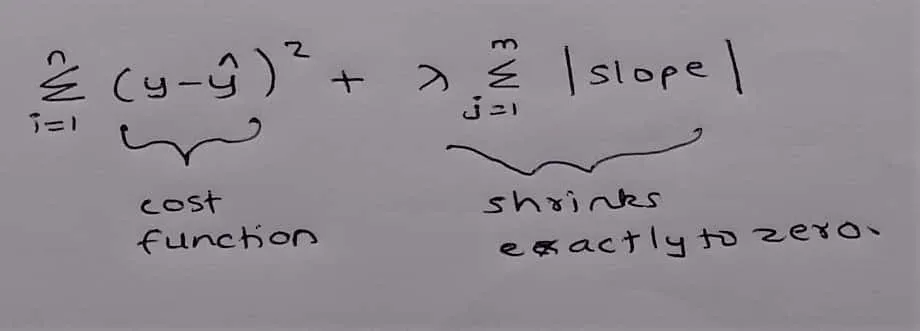

Lasso regression incorporates a penalty factor (λ) to shrink slope coefficients toward zero, aiding in feature selection by effectively setting less important features' coefficients to zero. λ's value is crucial, determined through cross-validation for optimal performance. Lasso's advantage lies in efficiently selecting a sparse model from a vast feature set.

# Preprocessing
We'll be using the same dataset and train/test split as in previous regression trains, and again, we will need to standardise the data before it can be used in our LASSO model.

In [256]:
#Import the scaling module
from sklearn.preprocessing import StandardScaler
# Create standardization object
scaler = StandardScaler()
# Save standardized features into new variable
X_scaled = scaler.fit_transform(X)

In [257]:
# Import train/test split module
from sklearn.model_selection import train_test_split
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=1,
                                                    shuffle=False)

shuffle=False in the train_test_split function means that the data will not be shuffled before splitting. This means that the order of the data points will be maintained when splitting into training and testing sets.

In [228]:
# Import LASSO module
from sklearn.linear_model import Lasso
# Create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.01)
# Train the LASSO model
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [229]:
# Extract intercept from model
intercept = float(lasso.intercept_)
# Extract coefficient from model
coeff = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])
# Extract intercept
print("Intercept:", float(intercept))

coeff

Intercept: 15.060016459872399


,Coefficient
TV,4.676748
Radio,1.544707
Newspaper,0.059651


# Assessment of predictive accuracy
Again, we'll make use of the sklearn.metrics library to assess the accuracy of our model. We'll fit the following models as well, in order to compare the LASSO results thoroughly:

A least squares model using all available predictors.
A least squares model using the predictors with non-zero coefficients from LASSO.
A ridge regression model using all available predictors.

In [258]:
X_subset = dataset2.drop(['Sales'], axis=1)  # Dropping the response variable
X_subset

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [259]:
#Assuming 'scaler' is already defined and 'y' contains 'BiodiversityHealthIndex'
X_subset_scaled = scaler.fit_transform(X_subset)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_subset_scaled,
                                                        y,
                                                        test_size=0.20,
                                                        random_state=1,
                                                        shuffle=False)


In [260]:
# Least squares using non-zero variables from LASSO
lm_subset = LinearRegression()

# Least squares using all predictors
lm_all = LinearRegression()

# Ridge using all predictors
ridge = Ridge()

lm_subset.fit(X_train2, y_train2)
lm_all.fit(X_train, y_train)
ridge.fit(X_train, y_train)

Ridge()

In [261]:
from sklearn import metrics
# Make training set predictions for each model
train_lm_subset = lm_subset.predict(X_train2)
train_lm_all = lm_all.predict(X_train)
train_ridge = ridge.predict(X_train)
train_lasso = lasso.predict(X_train)

In [262]:
# Make test set predictions for each model
test_lm_subset = lm_subset.predict(X_test2)
test_lm_all = lm_all.predict(X_test)
test_ridge = ridge.predict(X_test)
test_lasso = lasso.predict(X_test)

In [263]:
# Dictionary of results
results_dict = {'Training MSE':
                    {
                        "Least Squares, Subset": metrics.mean_squared_error(y_train2, train_lm_subset),
                        "Least Squares, All": metrics.mean_squared_error(y_train, train_lm_all),
                        "Ridge": metrics.mean_squared_error(y_train, train_ridge),
                        "LASSO": metrics.mean_squared_error(y_train, train_lasso)
                    },
                    'Test MSE':
                    {
                        "Least Squares, Subset": metrics.mean_squared_error(y_test2, test_lm_subset),
                        "Least Squares, All": metrics.mean_squared_error(y_test, test_lm_all),
                        "Ridge": metrics.mean_squared_error(y_test, test_ridge),
                        "LASSO": metrics.mean_squared_error(y_test, test_lasso)
                    }
                }

In [264]:
# Create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)
# View the results
results_df

,Training MSE,Test MSE
"Least Squares, Subset",2.734397,2.636941
"Least Squares, All",2.734397,2.636941
Ridge,2.735329,2.634231
LASSO,2.734631,2.631719


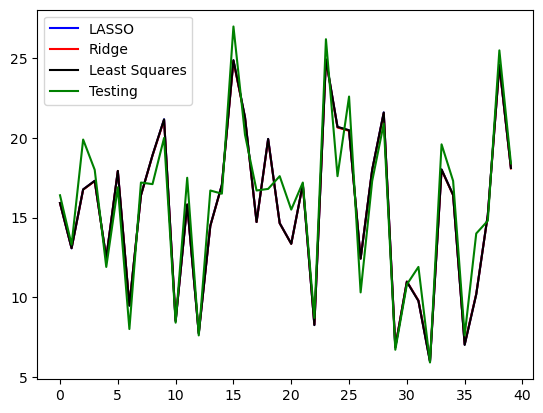

In [266]:
# we want to plot the train and test response variables as a continuous line
train_plot = pd.concat([y_train, pd.Series(y_test.iloc[0], index=['Next Time Point'])])
plt.plot(np.arange(len(y_test)), lasso.predict(X_test), label='LASSO',color='blue')
plt.plot(np.arange(len(y_test)), ridge.predict(X_test), label='Ridge', color='red')
plt.plot(np.arange(len(y_test)), lm_all.predict(X_test), label='Least Squares', color='black')
plt.plot(np.arange(len(y_test)), y_test.values, label='Testing', color='green')
plt.legend()

plt.show()